<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_HR_gr2/blob/Sokolova-Elena-folder/Sokolova%20Elena/%D0%A1%D1%82%D0%B0%D0%B6%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0_%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D0%BE%D0%B2%D0%B0_%D0%95%D0%BB%D0%B5%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np 
import pandas as pd 
import re

# для тестироввания необходимо локально загрузить файл с датасетом
data = pd.read_excel('/content/sample_data/dataset.xlsx')
data.head()

,Unnamed: 0,Дата отклика,ФИО,"Пол, возраст",ЗП,Ищет работу на должность,Город,Занятость,График,Опыт (),Последнее/нынешное место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Подходит - да/нет
0,0,2023-02-23 00:00:00,Bessonova Mariya,Женщина,90 000 руб.,Growth Product Manager,"Индонезия, Не готова к переезду, не готова к к...","проектная работа, частичная занятость, полная ...",удаленная работа,Опыт работы —5 лет 10 месяцев,PT MYBALI APP GROUP,Менеджер по продукту,"Высшее, 2023, Нетоло́гия, 2014, Университет Ро...",23 февраля 2023 в 16:30,да
1,1,2023-01-11 00:00:00,Ефремова Екатерина Вячеславовна,Женщина,не указана,Growth Product Manager,"Москва, Готова к переезду, готова к командировкам",полная занятость,"удаленная работа, гибкий график, полный день",Опыт работы —11 лет 11 месяцев,Банк Открытие,Product owner трайб сбережения и инвестиции,"Высшее, 2022, GeekBrains, 2010, Московский худ...",8 февраля 2023 в 09:15,да
2,2,2023-02-27 00:00:00,Фролов Артур Михайлович,"Мужчина, 33 года, родился 23 августа 1989",150 000 руб.,Growth Product Manager,"Санкт-Петербург, Готов к переезду: Москва, гот...","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —7 лет 2 месяца,DIKIY LLC,Директор по маркетингу и бренд-менеджер,"Высшее, 2013, Санкт-Петербургский государствен...",28 февраля 2023 в 09:41,да
3,3,2023-01-11 00:00:00,Хозаев Расул Шагаманович,"Мужчина, 32 года, родился 7 декабря 1990",не указана,Growth Product Manager,"Москва, м. Молодежная, Хочу переехать, готов к...","стажировка, частичная занятость, полная занятость","удаленная работа, гибкий график, полный день",Опыт работы —8 лет 10 месяцев,WeInvest,Product Manager (team leader),"Магистр, 2014, Московский государственный техн...",24 января 2023 в 12:07,да
4,4,2023-01-11 00:00:00,Шадрин Олег Михайлович,"Мужчина, 26 лет, родился 21 февраля 1996",150 000 руб.,Growth Product Manager,"Пермь, Хочу переехать, готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день",Опыт работы —5 лет 9 месяцев,Индивидуальное предпринимательство / частная п...,Product/Project manager,"Высшее, 2021, Российская академия народного хо...",6 февраля 2023 в 11:18,да


**Подготовка dataset-а**

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Unnamed: 0                       579 non-null    int64 
 1   Дата отклика                     579 non-null    object
 2   ФИО                              579 non-null    object
 3   Пол, возраст                     579 non-null    object
 4   ЗП                               579 non-null    object
 5   Ищет работу на должность         579 non-null    object
 6   Город                            579 non-null    object
 7   Занятость                        579 non-null    object
 8   График                           579 non-null    object
 9   Опыт ()                          579 non-null    object
 10  Последнее/нынешное место работы  579 non-null    object
 11  Последняя/нынешняя должность     579 non-null    object
 12  Образование и ВУЗ                579

In [40]:
# убираем строки, для которых не определен целевой параметр
data = data.dropna()

In [41]:
# убираем столбцы, не влияющие на качество обучения модели
features = data.drop(['Дата отклика', 'Обновление резюме','ФИО', 'Unnamed: 0'], axis=1).columns

In [42]:
data_clean = data[features]

In [43]:
def extract_age(arg):
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(',')[:2]
    if len(args_splited) > 1:
        year = int(re.findall(r'\d+', args_splited[1])[0])
    else:
        year = 0
    return year


def extract_gender(arg):
    if 'женщина' in arg.lower():
        return 0
    elif 'мужчина' in arg.lower():
        return 1
    else:
        return ""


data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)



data_clean.drop(['Пол, возраст'], axis=1, inplace=True)

<ipython-input-43-0743ab8ab26c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Пол'] = data_clean['Пол, возраст'].apply(extract_gender)
<ipython-input-43-0743ab8ab26c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Возраст'] = data_clean['Пол, возраст'].apply(extract_age)
<ipython-input-43-0743ab8ab26c>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [46]:

def get_education_level(arg):
    education_key_words = ['неоконченноевысшее', 'среднееспециальное', 'среднее', 'высшее', 'бакалавр', 'магистр', 'кандидатнаук', 'докторнаук']
    arg = ''.join(arg.split(' ')[:3])
    for i in range(len(education_key_words)):
      if education_key_words[i] in arg.lower():      
        return education_key_words[i]
    return ""

 
    
data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)

data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)

data_clean['Образование'].value_counts()

<ipython-input-46-d8045667b876>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Образование'] = data_clean['Образование и ВУЗ'].apply(get_education_level)
<ipython-input-46-d8045667b876>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Образование и ВУЗ'], axis=1, inplace=True)


высшее                326
среднееспециальное     55
магистр                38
бакалавр               32
неоконченноевысшее     27
среднее                16
кандидатнаук            5
докторнаук              1
Name: Образование, dtype: int64

In [47]:
def get_experience(arg):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
   
    if pd.isnull(arg) or arg == 'Не указано':
        return 0
    
    arg = arg.replace("—", '')
    args_splited = arg.split(' ')[:6]
    month = 0
    year = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
    return int(year)*12 + int(month)


data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)

# Медианый опыт работы (в месяцах)
print(data_clean['Опыт работы (месяц)'].median())

data_clean.drop(['Опыт ()'], axis=1, inplace=True)

99.0


<ipython-input-47-c3d823ab2253>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Опыт работы (месяц)'] = data_clean['Опыт ()'].apply(get_experience)
<ipython-input-47-c3d823ab2253>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.drop(['Опыт ()'], axis=1, inplace=True)


In [48]:
#кодируем бинарные категориальные признаки
data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


<ipython-input-48-49eb132054aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Подходит - да/нет'] = data_clean['Подходит - да/нет'].apply(lambda x: 0 if x == 'нет' else 1)


In [49]:

def is_full_employment(arg):
    if 'полная занятость' in arg.lower():
        return 1
    else:
        return 0
    
def is_part_employment(arg):
    if 'частичная занятость' in arg.lower():
        return 1
    else:
        return 0
    
def is_project(arg):
    if 'проектная работа' in arg.lower():
        return 1
    else:
        return 0
    
def is_volunteer(arg):
    if 'волонтёрство' in arg.lower() or 'волонтерство' in arg.lower():
        return 1
    else:
        return 0
    
def is_intern(arg):
    if 'стажировка' in arg.lower():
        return 1
    else:
        return 0

#################

    
def is_full_time(arg):
    if 'полный день' in arg.lower():
        return 1
    else:
        return 0
    
def is_shift_schedule(arg):
    if 'сменный график' in arg.lower():
        return 1
    else:
        return 0
    
def is_flexible_schedule(arg):
    if 'гибкий график' in arg.lower():
        return 1
    else:
        return 0
    
def is_remote_work(arg):
    if 'удалённая работа' in arg.lower() or 'удаленная работа' in arg.lower():
        return 1
    else:
        return 0
    
def is_shift_method(arg):
    if 'вахтовый метод' in arg.lower():
        return 1
    else:
        return 0
    
    
data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)
data_clean['проектная работа'] = data_clean['Занятость'].apply(is_project)
data_clean['волонтёрство'] = data_clean['Занятость'].apply(is_volunteer)
data_clean['стажировка'] = data_clean['Занятость'].apply(is_intern)

data_clean['полный день'] = data_clean['График'].apply(is_full_time)
data_clean['сменный график'] = data_clean['График'].apply(is_shift_schedule)
data_clean['гибкий график'] = data_clean['График'].apply(is_flexible_schedule)
data_clean['удалённая работа'] = data_clean['График'].apply(is_remote_work)
data_clean['вахтовый метод'] = data_clean['График'].apply(is_shift_method)


data_clean.drop(['Занятость'], axis=1, inplace=True)
data_clean.drop(['График'], axis=1, inplace=True)


<ipython-input-49-d0fb64e8c40d>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['полная занятость'] = data_clean['Занятость'].apply(is_full_employment)
<ipython-input-49-d0fb64e8c40d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['частичная занятость'] = data_clean['Занятость'].apply(is_part_employment)


In [50]:
def get_city(arg):
    arg = str(arg).lstrip()   
    city = arg.split(' ')[0]

    return city.replace(',','')


def get_ready_for_relocation(arg):
    arg = str(arg).lstrip()   
    arr = arg.split(',')

    
    if len(arr) > 3:
        ready_for_relocation = arr[2].strip()
    else:
        ready_for_relocation = arr[1].strip()

   
    if 'не' in ready_for_relocation.lower():
        return 0
    else:
        return 1
    

def get_ready_for_businessTrips(arg):
    arg = str(arg).lstrip()   
    arr = arg.split(',')
    
    ready_for_businessTrips = arr[-1].strip()
    
 
    if 'не' in ready_for_businessTrips.lower():
        return 0
    else:
        return 1



data_clean['Готовность к переезду'] = data_clean['Город'].apply(get_ready_for_relocation)
data_clean['Готовность к командировкам'] = data_clean['Город'].apply(get_ready_for_businessTrips)
data_clean['Город'] = data_clean['Город'].apply(get_city)


In [51]:
data_clean.head()

,ЗП,Ищет работу на должность,Город,Последнее/нынешное место работы,Последняя/нынешняя должность,Подходит - да/нет,Пол,Возраст,Образование,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к переезду,Готовность к командировкам
0,90 000 руб.,Growth Product Manager,Индонезия,PT MYBALI APP GROUP,Менеджер по продукту,1,0,0,высшее,70,1,1,1,0,0,0,0,0,1,0,0,0
1,не указана,Growth Product Manager,Москва,Банк Открытие,Product owner трайб сбережения и инвестиции,1,0,0,высшее,143,1,0,0,0,0,1,0,1,1,0,1,1
2,150 000 руб.,Growth Product Manager,Санкт-Петербург,DIKIY LLC,Директор по маркетингу и бренд-менеджер,1,1,33,высшее,86,1,1,1,0,0,1,0,1,1,0,1,1
3,не указана,Growth Product Manager,Москва,WeInvest,Product Manager (team leader),1,1,32,магистр,106,1,1,0,0,1,1,0,1,1,0,1,1
4,150 000 руб.,Growth Product Manager,Пермь,Индивидуальное предпринимательство / частная п...,Product/Project manager,1,1,26,высшее,69,1,1,1,0,0,1,0,1,1,0,1,1


In [52]:
data_clean = pd.get_dummies(data_clean)

In [53]:
data_clean.head()

,Подходит - да/нет,Пол,Возраст,Опыт работы (месяц),полная занятость,частичная занятость,проектная работа,волонтёрство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,Готовность к переезду,Готовность к командировкам,ЗП_1 200 EUR,ЗП_1 550 USD,ЗП_1 900 000 KZT,ЗП_1 руб.,ЗП_100 000 руб.,ЗП_110 000 руб.,ЗП_119 000 руб.,ЗП_120 000 руб.,ЗП_127 000 руб.,ЗП_130 000 руб.,ЗП_140 000 руб.,ЗП_150 000 руб.,ЗП_155 000 руб.,ЗП_160 000 руб.,ЗП_170 000 руб.,ЗП_180 000 руб.,ЗП_2 000 USD,ЗП_2 500 USD,ЗП_20 000 руб.,ЗП_200 000 руб.,ЗП_25 000 руб.,ЗП_250 000 руб.,ЗП_280 000 руб.,ЗП_3 500 USD,ЗП_30 000 руб.,ЗП_35 000 руб.,ЗП_350 000 руб.,ЗП_4 000 USD,ЗП_40 000 руб.,ЗП_45 000 руб.,ЗП_50 000 руб.,ЗП_55 000 руб.,ЗП_60 000 руб.,ЗП_600 000 KZT,ЗП_65 000 руб.,ЗП_70 000 руб.,ЗП_75 000 руб,ЗП_80 000 руб.,ЗП_85 000 руб.,ЗП_90 000 руб.,ЗП_95 000 руб.,ЗП_не указана,Ищет работу на должность_Growth Product Manager,Ищет работу на должность_HR-специалист,Ищет работу на должность_Product Manager в команду HR,Ищет работу на должность_Product Manager в команду Финансового департамента,Ищет работу на должность_Product Marketing Manager в Growth Hacking команду,Ищет работу на должность_Product manager в Growth Hacking команду,Ищет работу на должность_Project manager,Ищет работу на должность_Директор медицинской клиники,Город_Алматы,Город_Армения,Город_Астана,Город_Батуми,Город_Бишкек,Город_Брянск,Город_Волгоград,Город_Воронеж,Город_Германия,Город_Екатеринбург,Город_Ижевск,Город_Израиль,Город_Индия,Город_Индонезия,Город_Иркутск,Город_Казань,Город_Караганда,Город_Кемерово,Город_Киров,Город_Кишинёв,Город_Кострома,Город_Краснодар,Город_Кумертау,Город_Магнитогорск,Город_Минск,Город_Москва,Город_Набережные,Город_Нижний,Город_Новосибирск,Город_ОАЭ,Город_Октябрьский,Город_Пермь,Город_Ростов-на-Дону,Город_Самара,Город_Санкт-Петербург,Город_Саратов,Город_Саров,Город_Сербия,Город_Сочи,Город_Стерлитамак,Город_Таиланд,Город_Ташкент,Город_Тбилиси,Город_Тольятти,Город_Томск,Город_Тула,Город_Турция,Город_Тюмень,Город_Ульяновск,Город_Уфа,Город_УфаНе,Город_Челябинск,Город_Щелково,Город_Энгальс,Город_Ярославль,"Последнее/нынешное место работы_""CREOS"" - Creos Play LT","Последнее/нынешное место работы_""Smart"" Международный онлайн-институт психологии","Последнее/нынешное место работы_""beU delivery"" (YC W22), Эфиопия","Последнее/нынешное место работы_""МИАтел"" / телеком-оператор России и Казахстана","Последнее/нынешное место работы_""Точнотест-регион""",Последнее/нынешное место работы_99 Ballov,Последнее/нынешное место работы_Addie Digital,Последнее/нынешное место работы_Aitu Dala,Последнее/нынешное место работы_Alfa clean,Последнее/нынешное место работы_ArrowLabs,Последнее/нынешное место работы_Asteroid team / KiteGroup / Money Sharks,Последнее/нынешное место работы_BlackWall Group,Последнее/нынешное место работы_Bls,Последнее/нынешное место работы_Botmother (конструктор чат-ботов),Последнее/нынешное место работы_Boy Cut KRD,Последнее/нынешное место работы_Brandson (Total Skills Network),Последнее/нынешное место работы_Bright Prime,Последнее/нынешное место работы_Bugin Holding,Последнее/нынешное место работы_Burger club,Последнее/нынешное место работы_Cityfalcon,Последнее/нынешное место работы_Coffx Coffee (стартап),Последнее/нынешное место работы_Concept Group,Последнее/нынешное место работы_Cosmoprof,Последнее/нынешное место работы_CryptoVerse,Последнее/нынешное место работы_Cyber Arena LLC (Game Dev P2E Crypto),Последнее/нынешное место работы_DIKIY LLC,Последнее/нынешное место работы_DNS магазины цифровой и бытовой техники,Последнее/нынешное место работы_Deep agency,Последнее/нынешное место работы_Dentsu,Последнее/нынешное место работы_EPG Service,"Последнее/нынешное место работы_Ebay, Wildberries","Последнее/нынешное место работы_FBS.com (крупнейший международный финансовый брокер, 17 миллионов клиентов в мире)",Последнее/нынешное место работы_FactoryH,Последнее/нынешное место работы_Fintex,Последнее/нынешное место работы_Food Tech Family,После

In [55]:
                    

# Последовательная модель НС
from tensorflow.keras.models import Sequential 

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Слой задания активационной функции <----- !!!
from tensorflow.keras.layers import Activation

# Утилиты предобработки данных
from tensorflow.keras import utils

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Рисование графиков
import matplotlib.pyplot as plt 

In [56]:
features = data_clean.drop('Подходит - да/нет', axis=1).columns
X, y = data_clean[features], data_clean['Подходит - да/нет']

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (350, 857) (350,)
Test: (150, 857) (150,)


**Создание модели**

In [78]:
import tensorflow as tf

In [132]:
def create_model():

    # Создание модели
    model = Sequential()

    # Добавление слоев
    model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(20))
    model.add(Activation('sigmoid'))
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция и возврат модели
    model.compile(loss='binary_crossentropy', 
                  optimizer=Adam(learning_rate=0.001), 
                  metrics=['accuracy'])
    
    return model

In [133]:
model = create_model()

# Обучение нейронной сети
history = model.fit(X_train,               # Обучающая выборка параметров
          y_train,               # Обучающая выборка меток класса
          batch_size=8,          # Размер батча (пакета)
          epochs=50,            # Количество эпох обучения
          validation_split=0.2,  # Доля проверочной выборки
          verbose=1)             # Отображение хода обучения

Epoch 1/50
35/35 [==============================] - 1s 17ms/step - loss: 0.1931 - accuracy: 0.9750 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 2/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1254 - accuracy: 0.9750 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 0.1205 - accuracy: 0.9750 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 4/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1192 - accuracy: 0.9750 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 0.1184 - accuracy: 0.9750 - val_loss: 0.0283 - val_accuracy: 1.0000
Epoch 6/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1176 - accuracy: 0.9750 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 7/50
35/35 [==============================] - 0s 4ms/step - loss: 0.1175 - accuracy: 0.9750 - val_loss: 0.0239 - val_accuracy: 1.0000
Epoch 8/50
35/35 [=

In [134]:
scores = model.evaluate(X_test, 
                        y_test, 
                        verbose=1
                        )

5/5 [==============================] - 0s 5ms/step - loss: 0.1367 - accuracy: 0.9800


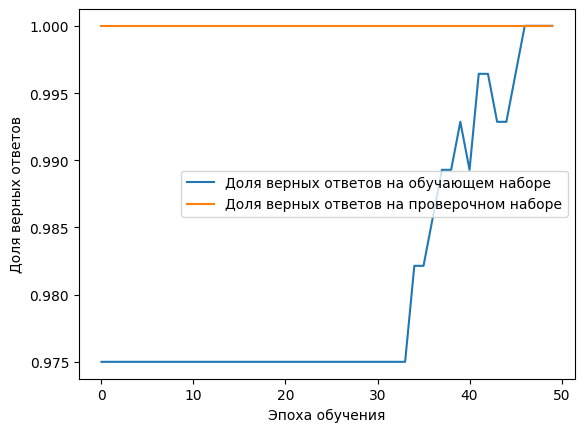

In [135]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')

# Визуализация точности на проверочной выборке
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')

# Отрисовка подписей осей
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')

# Отрисовка легенды
plt.legend()

# Вывод графика
plt.show()

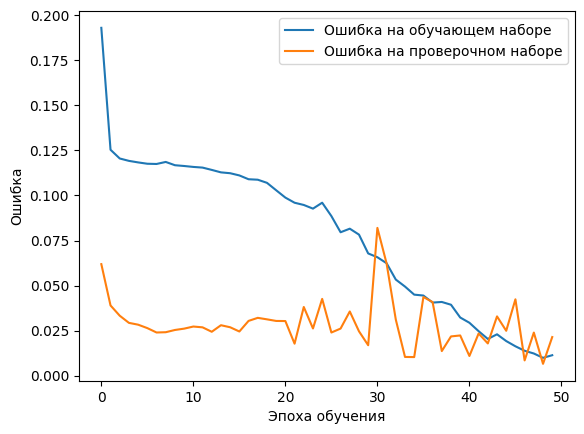

In [136]:
plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')

plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')

plt.legend()

plt.show()

In [137]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


Accuracy: 0.98
Precision: 1.00
Recall: 0.25
F1 score: 0.40
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 score: 1.00


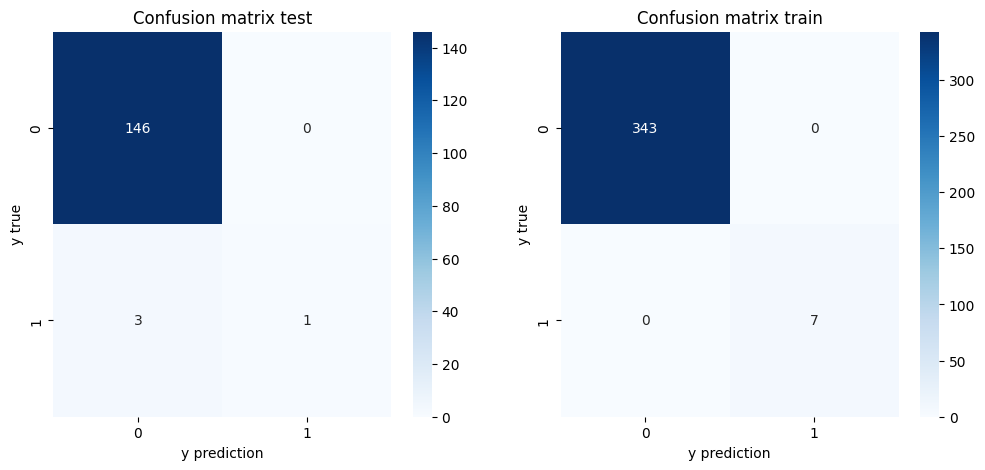

In [138]:
from sklearn import metrics
confusion_matrix_test = metrics.confusion_matrix(y_test, y_predict_test.round())
confusion_matrix_train = metrics.confusion_matrix(y_train, y_predict_train.round())

import seaborn as sns 
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) #фигура + 2 координатные плоскости
#Строим тепловую карту для первой матрицы ошибок
sns.heatmap(confusion_matrix_test, annot=True, fmt='', ax=axes[0], cmap='Blues')
#Добавляем название графику и подписи осей абсцисс и ординат
axes[0].set_title('Confusion matrix test')
axes[0].set_xlabel('y prediction')
axes[0].set_ylabel('y true')
sns.heatmap(confusion_matrix_train, annot=True, fmt='', ax=axes[1], cmap='Blues')
axes[1].set_title('Confusion matrix train')
axes[1].set_xlabel('y prediction')
axes[1].set_ylabel('y true')

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predict_test.round())))
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predict_test.round())))
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predict_test.round())))
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predict_test.round())))

print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_train, y_predict_train.round())))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_train, y_predict_train.round())))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_train, y_predict_train.round())))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_train, y_predict_train.round())))




